In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
ques_morning_bodyfatigue = pd.read_csv('./questionaire_data/ques_morning_bodyfatigue.csv')
ques_morning_dams = pd.read_csv('./questionaire_data/ques_morning_dams.csv')
weather_tokyo = pd.read_csv('./weather_data/weather_tokyo.csv')
weather_osaka = pd.read_csv('./weather_data/weather_osaka.csv')

In [32]:
ques_morning_dams

,Unnamed: 0,datetime,user_id,activity,record_type_id,name,value,value_dams
0,1,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,25.0,はつらつとした,3: どちらともいえない,3.0
1,2,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,26.0,暗い,0: まったくあてはまらない,0.0
2,3,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,27.0,気がかりな,4: ややあてはまる,4.0
3,4,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,28.0,嬉しい,2: ややあてはまらない,2.0
4,5,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,29.0,嫌な,0: まったくあてはまらない,0.0
...,...,...,...,...,...,...,...,...
12146,172148,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,29.0,嫌な,0: まったくあてはまらない,0.0
12147,172149,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,30.0,不安な,0: まったくあてはまらない,0.0
12148,172150,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,31.0,楽しい,3: どちらともいえない,3.0
12149,172151,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,32.0,沈んだ,0: まったくあてはまらない,0.0


In [52]:
ques_morning_bodyfatigue['datetime'] = pd.to_datetime(ques_morning_bodyfatigue['datetime'])
ques_morning_bodyfatigue['Date'] = pd.to_datetime(ques_morning_bodyfatigue['datetime'], format='%Y%m%d').dt.date
ques_morning_dams['datetime'] = pd.to_datetime(ques_morning_dams['datetime'])
ques_morning_dams['Date'] = pd.to_datetime(ques_morning_dams['datetime'], format='%Y%m%d').dt.date
weather_osaka['Date'] = pd.to_datetime(weather_osaka['Date'], format='%Y-%m-%d').dt.date
weather_tokyo['Date'] = pd.to_datetime(weather_tokyo['Date'], format='%Y-%m-%d').dt.date
weather_osaka['locate'] = 'osaka'
weather_tokyo['locate'] = 'tokyo'
ques_morning_dams.loc[ques_morning_dams['user_id']<20,'locate'] = 'osaka'
ques_morning_dams.loc[ques_morning_dams['user_id']>19,'locate'] = 'tokyo'
ques_morning_dams.loc[ques_morning_dams['user_id']==100,'locate'] = 'osaka'
ques_morning_bodyfatigue.loc[ques_morning_bodyfatigue['user_id']<20,'locate'] = 'osaka'
ques_morning_bodyfatigue.loc[ques_morning_bodyfatigue['user_id']>19,'locate'] = 'tokyo'
ques_morning_bodyfatigue.loc[ques_morning_bodyfatigue['user_id']==100,'locate'] = 'osaka'

In [57]:
weather_all = pd.concat([weather_tokyo,weather_osaka])
# weather_all.to_csv('./weather_data/weather_all.csv')

In [58]:
morning_bodyfatigue_weather = pd.merge(ques_morning_bodyfatigue, weather_all, on=['Date','locate'])
morning_dams_weather = pd.merge(ques_morning_dams, weather_all, on=['Date','locate'])

In [62]:
dams_positive = morning_dams_weather[(morning_dams_weather['record_type_id']==25)|
                    (morning_dams_weather['record_type_id']==28)|
                    (morning_dams_weather['record_type_id']==31)]

In [64]:
dams_positive.columns

Index(['Unnamed: 0_x', 'datetime', 'user_id', 'activity', 'record_type_id',
       'name', 'value', 'value_dams', 'Date', 'locate', 'Unnamed: 0_y',
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'ave_windspeed', 'ave_vaporpressure', 'ave_humidity',
       'ave_cloudcover', 'weather_6to18', 'weather_18to6'],
      dtype='object')

In [73]:
# weather_dams = dams_positive[['value','value_dams', 'Date', 'locate', 
#        'ave_temperature', 'max_temperature', 'mini_temperature',
#        'sum_rainfall', 'ave_windspeed', 'ave_vaporpressure', 'ave_humidity',
#        'ave_cloudcover']]

# df_columns = weather_dams.columns.to_list()
# g_list = [i for i in df_columns]

# columns = g_list
# for_correlation = list(set([columns[np.random.randint(0, len(columns)-1)] for i in range(3000)]))[:40]
# # data = weather_dams[for_correlation]
# data = weather_dams

# f = plt.figure(figsize=(18, 18))
# plt.matshow(data.corr(), fignum=f.number)
# plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=50)
# plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=13)

<AxesSubplot:>

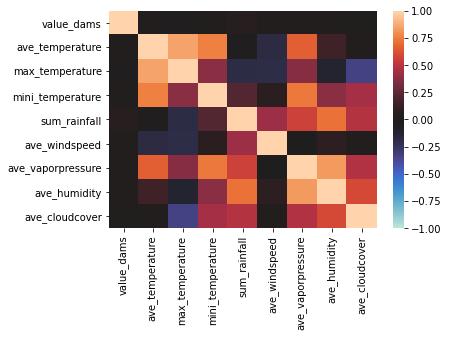

In [71]:
sns.heatmap(weather_dams.corr(), vmax=1, vmin=-1, center=0)

<AxesSubplot:xlabel='ave_temperature', ylabel='value_dams'>

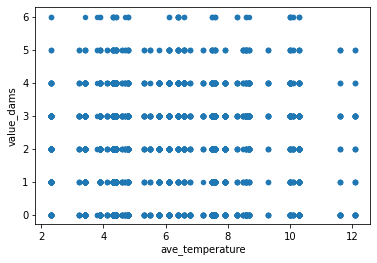

In [75]:
weather_dams.plot.scatter(x='ave_temperature',y='value_dams')